In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

In [131]:
df = pd.read_csv('ADANIPORTS.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


data cleaning

In [132]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.dropna(inplace=True)
display(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2456 entries, 2011-06-01 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              2456 non-null   object 
 1   Series              2456 non-null   object 
 2   Prev Close          2456 non-null   float64
 3   Open                2456 non-null   float64
 4   High                2456 non-null   float64
 5   Low                 2456 non-null   float64
 6   Last                2456 non-null   float64
 7   Close               2456 non-null   float64
 8   VWAP                2456 non-null   float64
 9   Volume              2456 non-null   int64  
 10  Turnover            2456 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  2456 non-null   int64  
 13  %Deliverble         2456 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 287.8+ KB


None

#calculate daily returns. #through percentage Changr(.pct.change())

In [133]:
 
df['Daily_return'] = df['Close'].pct_change()


#Calculating Moving Averages


In [134]:
df['7-day MA'] = df['Close'].rolling(window=7).mean()
df['30-day MA'] = df['Close'].rolling(window=30).mean()

In [135]:
print(df[['Close','Daily_return','7-day MA','30-day MA']].head())

             Close  Daily_return  7-day MA  30-day MA
Date                                                 
2011-06-01  164.00           NaN       NaN        NaN
2011-06-02  161.25     -0.016768       NaN        NaN
2011-06-03  161.05     -0.001240       NaN        NaN
2011-06-06  159.85     -0.007451       NaN        NaN
2011-06-07  157.25     -0.016265       NaN        NaN


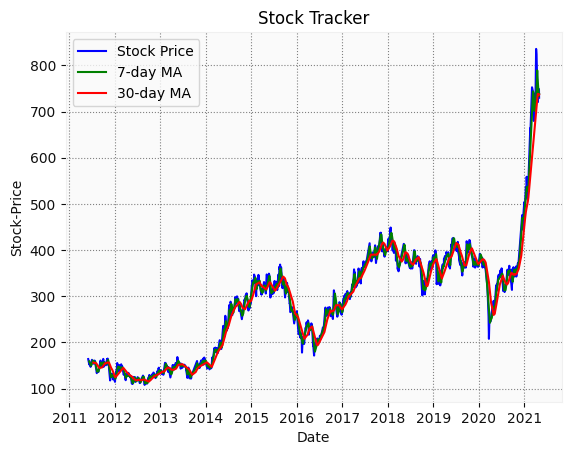

In [136]:
plt.Figure(figsize=(12,6))#width and height(12,6)
plt.plot(df.index,df['Close'],label = 'Stock Price',color = 'blue')
plt.plot(df.index,df['7-day MA'],label = "7-day MA",color= 'green')
plt.plot(df.index,df['30-day MA'],label= '30-day MA',color = 'red')
plt.title("Stock Tracker")
plt.xlabel("Date")
plt.ylabel('Stock-Price')
plt.legend()
plt.show()

In [137]:
max_price= df['Close'].max()
min_price= df['Close'].min()
max_date = df['High'].idxmax()  # Date of max price
min_date = df['Low'].idxmin()   # Date of min price
print(f"Maximum stock is {max_price} on {max_date}.")
print(f"Minimum stock is {min_price} on {min_date}.")

Maximum stock is 835.55 on 2021-04-07 00:00:00.
Minimum stock is 108.0 on 2012-08-24 00:00:00.


Create Addplots for Moving Averages

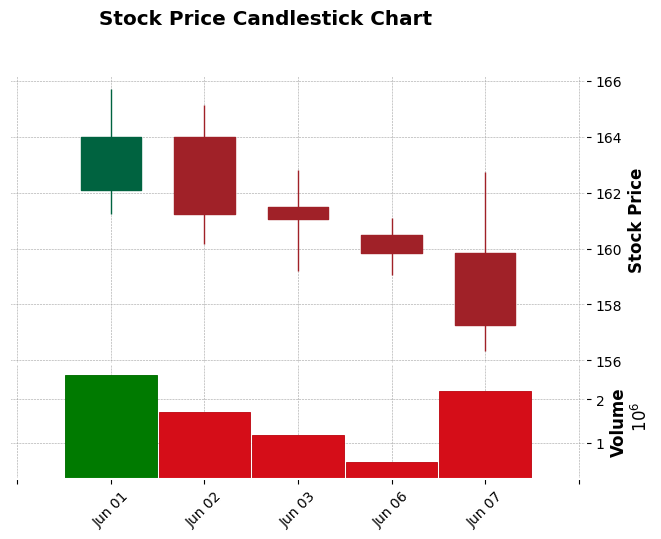

In [138]:

# Plot candlestick chart
add_plot = [ mpf.make_addplot(df['7-day MA'],color = 'blue', linestyle = 'dashed',label = '7-day MA'),
mpf.make_addplot(df['30-day MA'],color = 'orange',linestyle= 'dotted',label = '30-day MA')]
mpf.plot(df.head(), type='candle', volume=True, style='charles', 
         title="Stock Price Candlestick Chart",
         ylabel="Stock Price", ylabel_lower="Volume")

/home/sakshi/.local/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


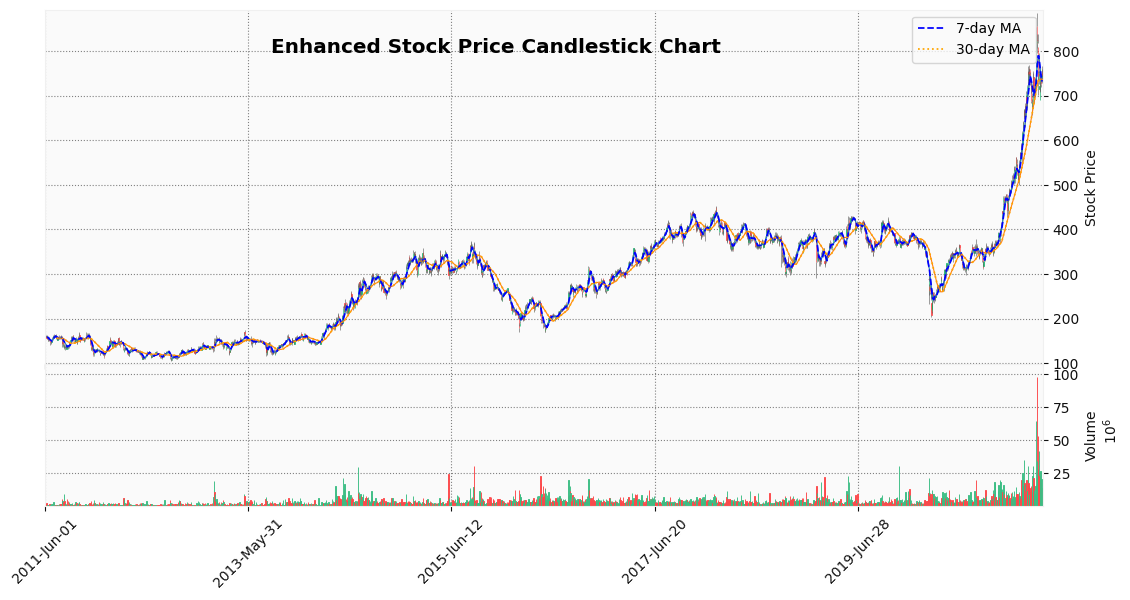

In [139]:
style = mpf.make_mpf_style(base_mpf_style='yahoo', gridcolor='gray', gridstyle='dotted')
mpf.plot(df,
         type='candle', volume = True, style = style,addplot = add_plot,title="Enhanced Stock Price Candlestick Chart",
         ylabel="Stock Price",
         ylabel_lower="Volume",
         figratio=(12,6),  # Adjust figure size
         tight_layout=True,
         mav=(7,30),  # Show 7-day and 30-day moving averages
         show_nontrading=False)


In [140]:
df.dropna(inplace=True)
print(len(df.index), len(df['7-day MA']), len(df['30-day MA']))
df = df.iloc[-min(len(df.index), len(df['7-day MA']), len(df['30-day MA'])):]




2427 2427 2427


Find and Annotate Maximum & Minimum Prices

In [141]:
# Create annotation addplots
annotations = [
    mpf.make_addplot(
        [max_price if date == max_date else np.nan for date in df.index],
        scatter=True, markersize=100, marker='^', color='green', label="Max Price"
    ),
    mpf.make_addplot(
        [min_price if date == min_date else np.nan for date in df.index],
        scatter=True, markersize=100, marker='v', color='red', label="Min Price"
    )
]

/home/sakshi/.local/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


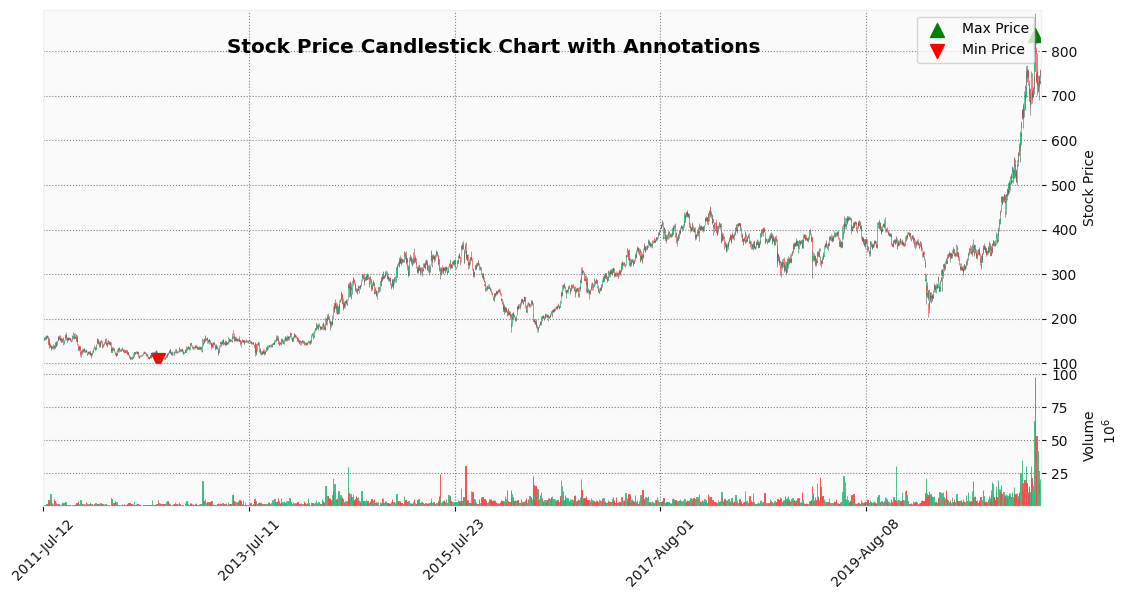

In [142]:
# Define custom style
style = mpf.make_mpf_style(base_mpf_style='yahoo', gridcolor='gray', gridstyle='dotted')

# Create and plot the enhanced candlestick chart
mpf.plot(df, 
         type='candle', 
         volume=True, 
         style=style, 
         addplot=annotations,  # Add annotations for high/low prices
         title="Stock Price Candlestick Chart with Annotations",
         ylabel="Stock Price", 
         ylabel_lower="Volume",
         figratio=(12,6), 
         tight_layout=True, 
         show_nontrading=False)


In [146]:
# Get stock data for a company (e.g., Apple - AAPL)
ticker = "AAPL"  # Change this to any stock symbol
df = yf.download(ticker, period="6mo", interval="1d")

# Display first few rows
print(df.head())

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))


Empty DataFrame
Columns: [(Adj Close, AAPL), (Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []


[*********************100%***********************]  1 of 1 completed


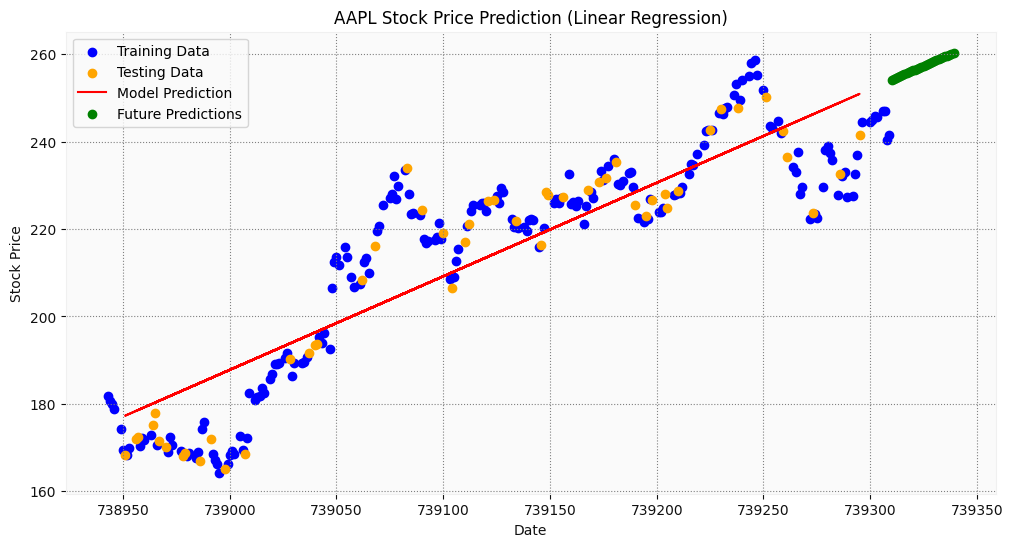

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#  Fetch Real-Time Stock Data
ticker = "AAPL"  # Change to any stock symbol
df = yf.download(ticker, period="1y", interval="1d")  # Last 1 year of data

#  Prepare Data for Regression
df['Date'] = df.index.map(pd.Timestamp.toordinal)  # Convert dates to numerical values
X = df[['Date']]  # Feature: Date (as numeric)
y = df['Close']   # Target: Closing Price

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Scale Data (Optional, but improves performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict Future Stock Prices
future_days = 30  # Predict the next 30 days
future_dates = np.array([df.index[-1] + pd.Timedelta(days=i) for i in range(1, future_days+1)])
future_dates_ordinal = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)
future_dates_scaled = scaler.transform(future_dates_ordinal)
predicted_prices = model.predict(future_dates_scaled)

# Plot Actual vs. Predicted Prices
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.scatter(X_test, y_test, color='orange', label="Testing Data")
plt.plot(X_test, model.predict(X_test_scaled), color='red', label="Model Prediction")
plt.scatter(future_dates_ordinal, predicted_prices, color='green', label="Future Predictions")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"{ticker} Stock Price Prediction (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()
